In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Data Understanding & Exploration**

In [4]:
#Reading ‘Car name.csv’ as a DataFrame and assign it to a variable
car_name = pd.read_csv("Car name.csv")
car_name.head()


,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [5]:
print(car_name.shape)

(398, 1)


In [6]:
#Read ‘Car-Attributes.json as a DataFrame and assign it to a variable.
car_attribute = pd.read_json("Car-Attributes.json")
car_attribute.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [7]:
car_attribute.shape

(398, 8)

In [8]:
#Merge both the DataFrames together to form a single DataFrame
df_merge = pd.concat([car_name,car_attribute],axis=1)
df_merge.head(20)


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
5,ford galaxie 500,15.0,8,429.0,198,4341,10.0,70,1
6,chevrolet impala,14.0,8,454.0,220,4354,9.0,70,1
7,plymouth fury iii,14.0,8,440.0,215,4312,8.5,70,1
8,pontiac catalina,14.0,8,455.0,225,4425,10.0,70,1
9,amc ambassador dpl,15.0,8,390.0,190,3850,8.5,70,1


In [9]:
df_merge.shape

(398, 9)

In [10]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [11]:
#Print 5 point summary of the numerical features and share insights.
df_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


**Insights**  
*1) The mean MPG stands at 23.5mpg with 25% vehicles with 0-17.5mpg, 2nd quarter with 17.5-23.0mpg, 3rd quarter having vehicle with mpg between 23.0-29.0 and the max being at 46.6mpg.*  
*2) Engine cyclinder ranges from 3 to 8.*  
*3) Horsepower feature is not shown as its an object datatype. We will need to convert it to integer datatype.*  

**2. Data Preparation & Analysis**

In [12]:
#Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.
def missing_values_as_perc(df):
    return round(df.isnull().sum()/len(df)*100,2)
missing_values=missing_values_as_perc(df_merge)
print("Missing value Percentage in feature.")
print(missing_values)

Missing value Percentage in feature.
car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


There are no missing values in the data. So no need to impute right now.

In [13]:
#Check for duplicate values in the data and impute with the best suitable approach
df1 = df_merge.copy()
duplicate_rows=df1.duplicated().sum()
print(f"Dataframe has {duplicate_rows} duplicate rows.")

Dataframe has 0 duplicate rows.


The dataframe has 0 duplicate rows so no need for imputation.

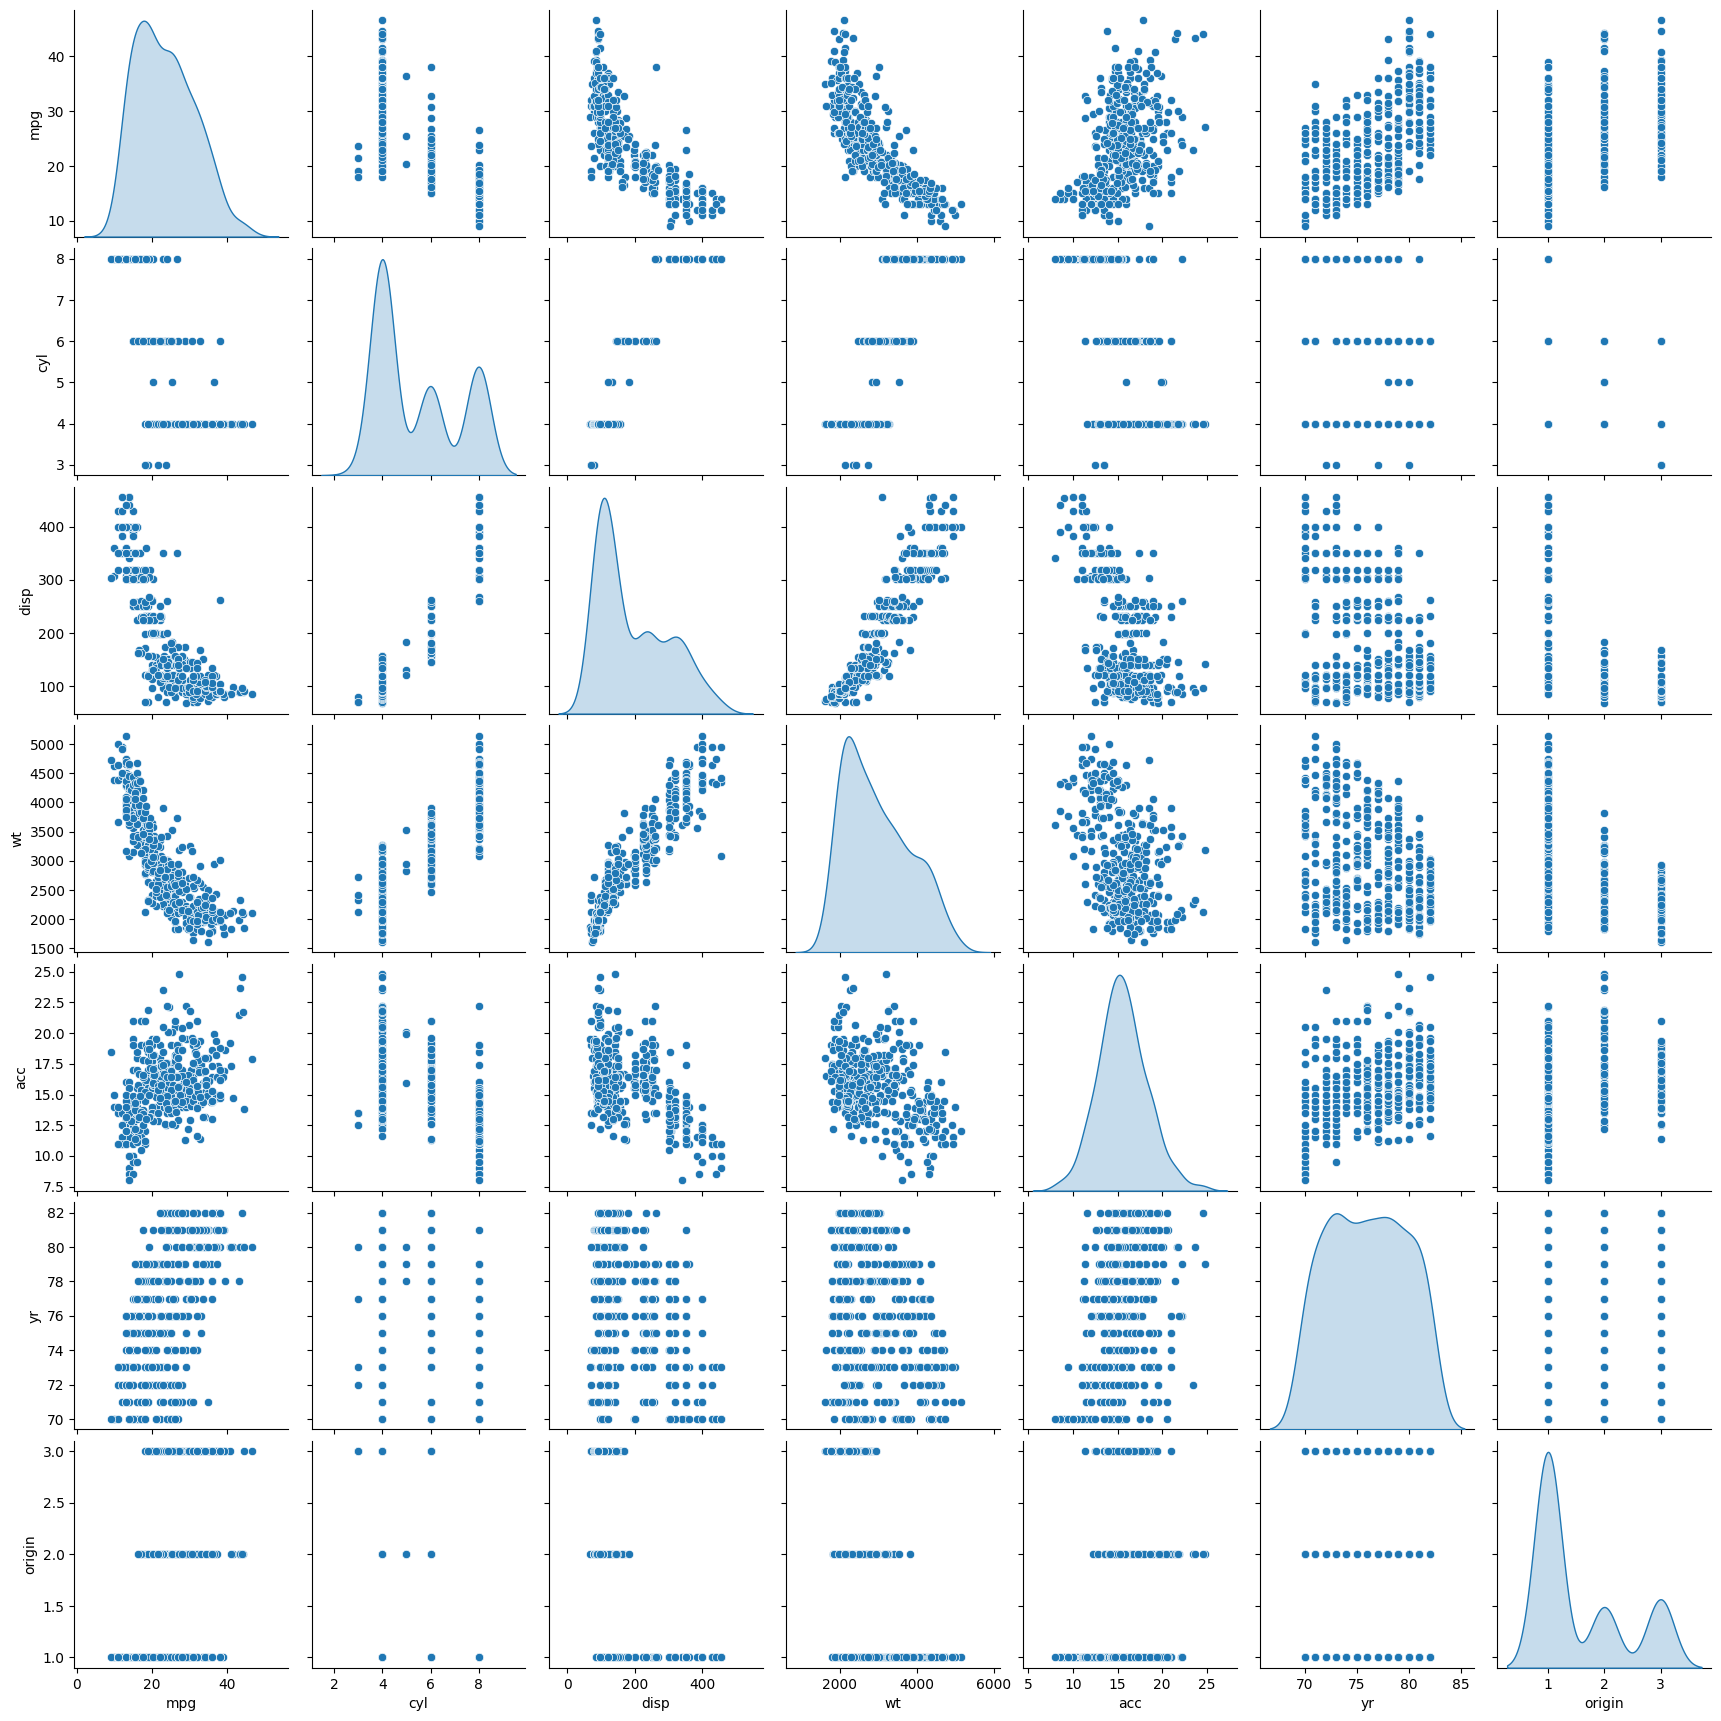

In [14]:
# Plot a pairplot for all features.
sns.pairplot(df1,diag_kind="kde");

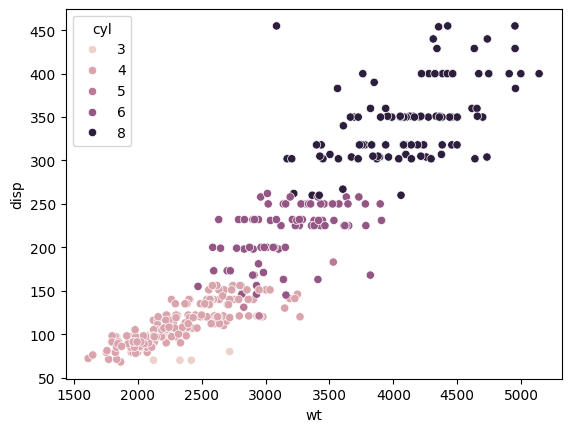

In [15]:
#Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’
sns.scatterplot(df1,x="wt",y="disp",hue="cyl");

**Insights**  
*1) There's positive correlation between displacement and weight of the vehicle.*  
*2) High displacement and weight automobiles have higher cyclinder count.*


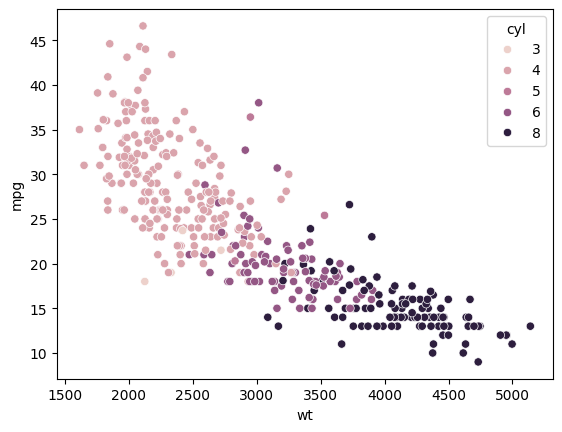

In [16]:
#Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’
sns.scatterplot(df1,x="wt",y="mpg",hue="cyl");

**G. Share insights for Q2.f**  
*1) The plot clearly shows that the MPG and Weight of the automobiles are negatively correlated.*  
*2) Higher cyclinder count is seen in high weight and Low mpg autombiles.*    

In [17]:
df1.dtypes

car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object

In [18]:
df1.shape

(398, 9)

In [19]:
#H. Check for unexpected values in all the features and datapoints with such values.
df2 = df1.copy()
df2.head()
numeric_df = df2.drop("car_name",axis=1)
for col in numeric_df.columns:
    numeric_df[col]=pd.to_numeric(numeric_df[col],errors="coerce")


In [20]:
numeric_df.isna().sum()

mpg       0
cyl       0
disp      0
hp        6
wt        0
acc       0
yr        0
origin    0
dtype: int64

**As we can see above there are 6 unexpected values in hp column of dataframe. So we are going to drop these columns as it is negligible number of rows.**

In [21]:
#creating df3 for further processing of data
df3=numeric_df.dropna(axis=0)
df3.isna().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

In [22]:
df3.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


**3. Clustering:**

In [23]:
#Apply K-Means clustering for 2 to 10 clusters
from sklearn.preprocessing import StandardScaler
#scaling the data
scaler=StandardScaler()
df3_scaled = scaler.fit_transform(df3)

In [24]:
from sklearn.cluster import KMeans
#Creating an empty list to store inertia for each K value.
inertia_values = []
#Trying Kmeans for K=2 to 10
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,random_state=42,n_init='auto')
    kmeans.fit(df3_scaled)
    inertia_values.append(kmeans.inertia_)

In [25]:
inertia_values

[1558.2252946476976,
 1172.3513052255125,
 968.1091493182445,
 815.8099401809154,
 739.1418895853398,
 669.4500245707981,
 635.0688897783948,
 605.5874598740028,
 568.9037343228619]

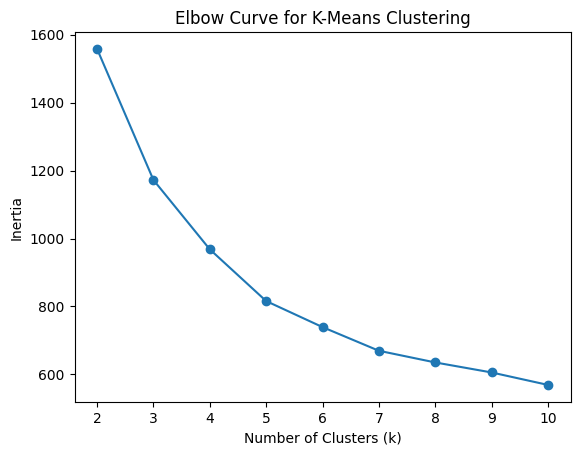

In [26]:
#Plot a visual and find elbow point.
plt.plot(range(2,11),inertia_values,marker='o')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

**Based on the Elbow plot, most of the variance is explained at K=7. So 7 clusters is the elbow point. S0 7 is the optimal number of clusters.**  

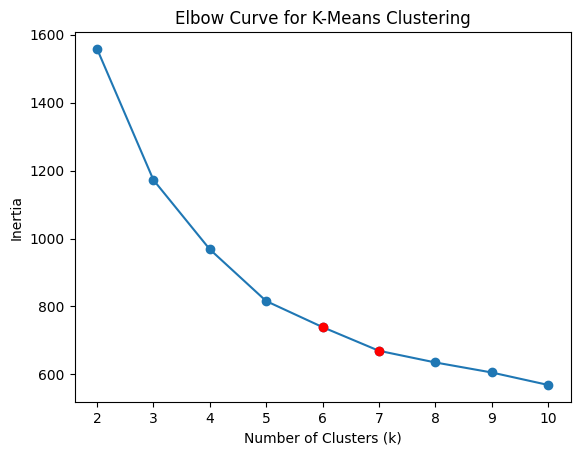

In [56]:
plt.plot(range(2,11),inertia_values,marker='o')
plt.title('Elbow Curve for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

highlight_points = [(7, inertia_values[5]), (6, inertia_values[4])]  # Example points, you can modify these
for point in highlight_points:
    plt.scatter(point[0], point[1], color='red', zorder=5)  # Overlay red markers at the specified points

plt.show()


In [28]:
#D. Train a K-means clustering model once again on the optimal number of clusters
kmeans = KMeans(n_clusters=7,random_state=42,n_init='auto')
kmeans.fit(df3_scaled)

KMeans(n_clusters=7, n_init='auto', random_state=42)

In [29]:
#Add a new feature in the DataFrame which will have labels based upon cluster value.
df3.loc[:,'cluster_label'] = kmeans.fit_predict(df3_scaled)
df3.head(20)

C:\Users\prath\AppData\Local\Temp\ipykernel_4772\1693971363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:,'cluster_label'] = kmeans.fit_predict(df3_scaled)


,mpg,cyl,disp,hp,wt,acc,yr,origin,cluster_label
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,0


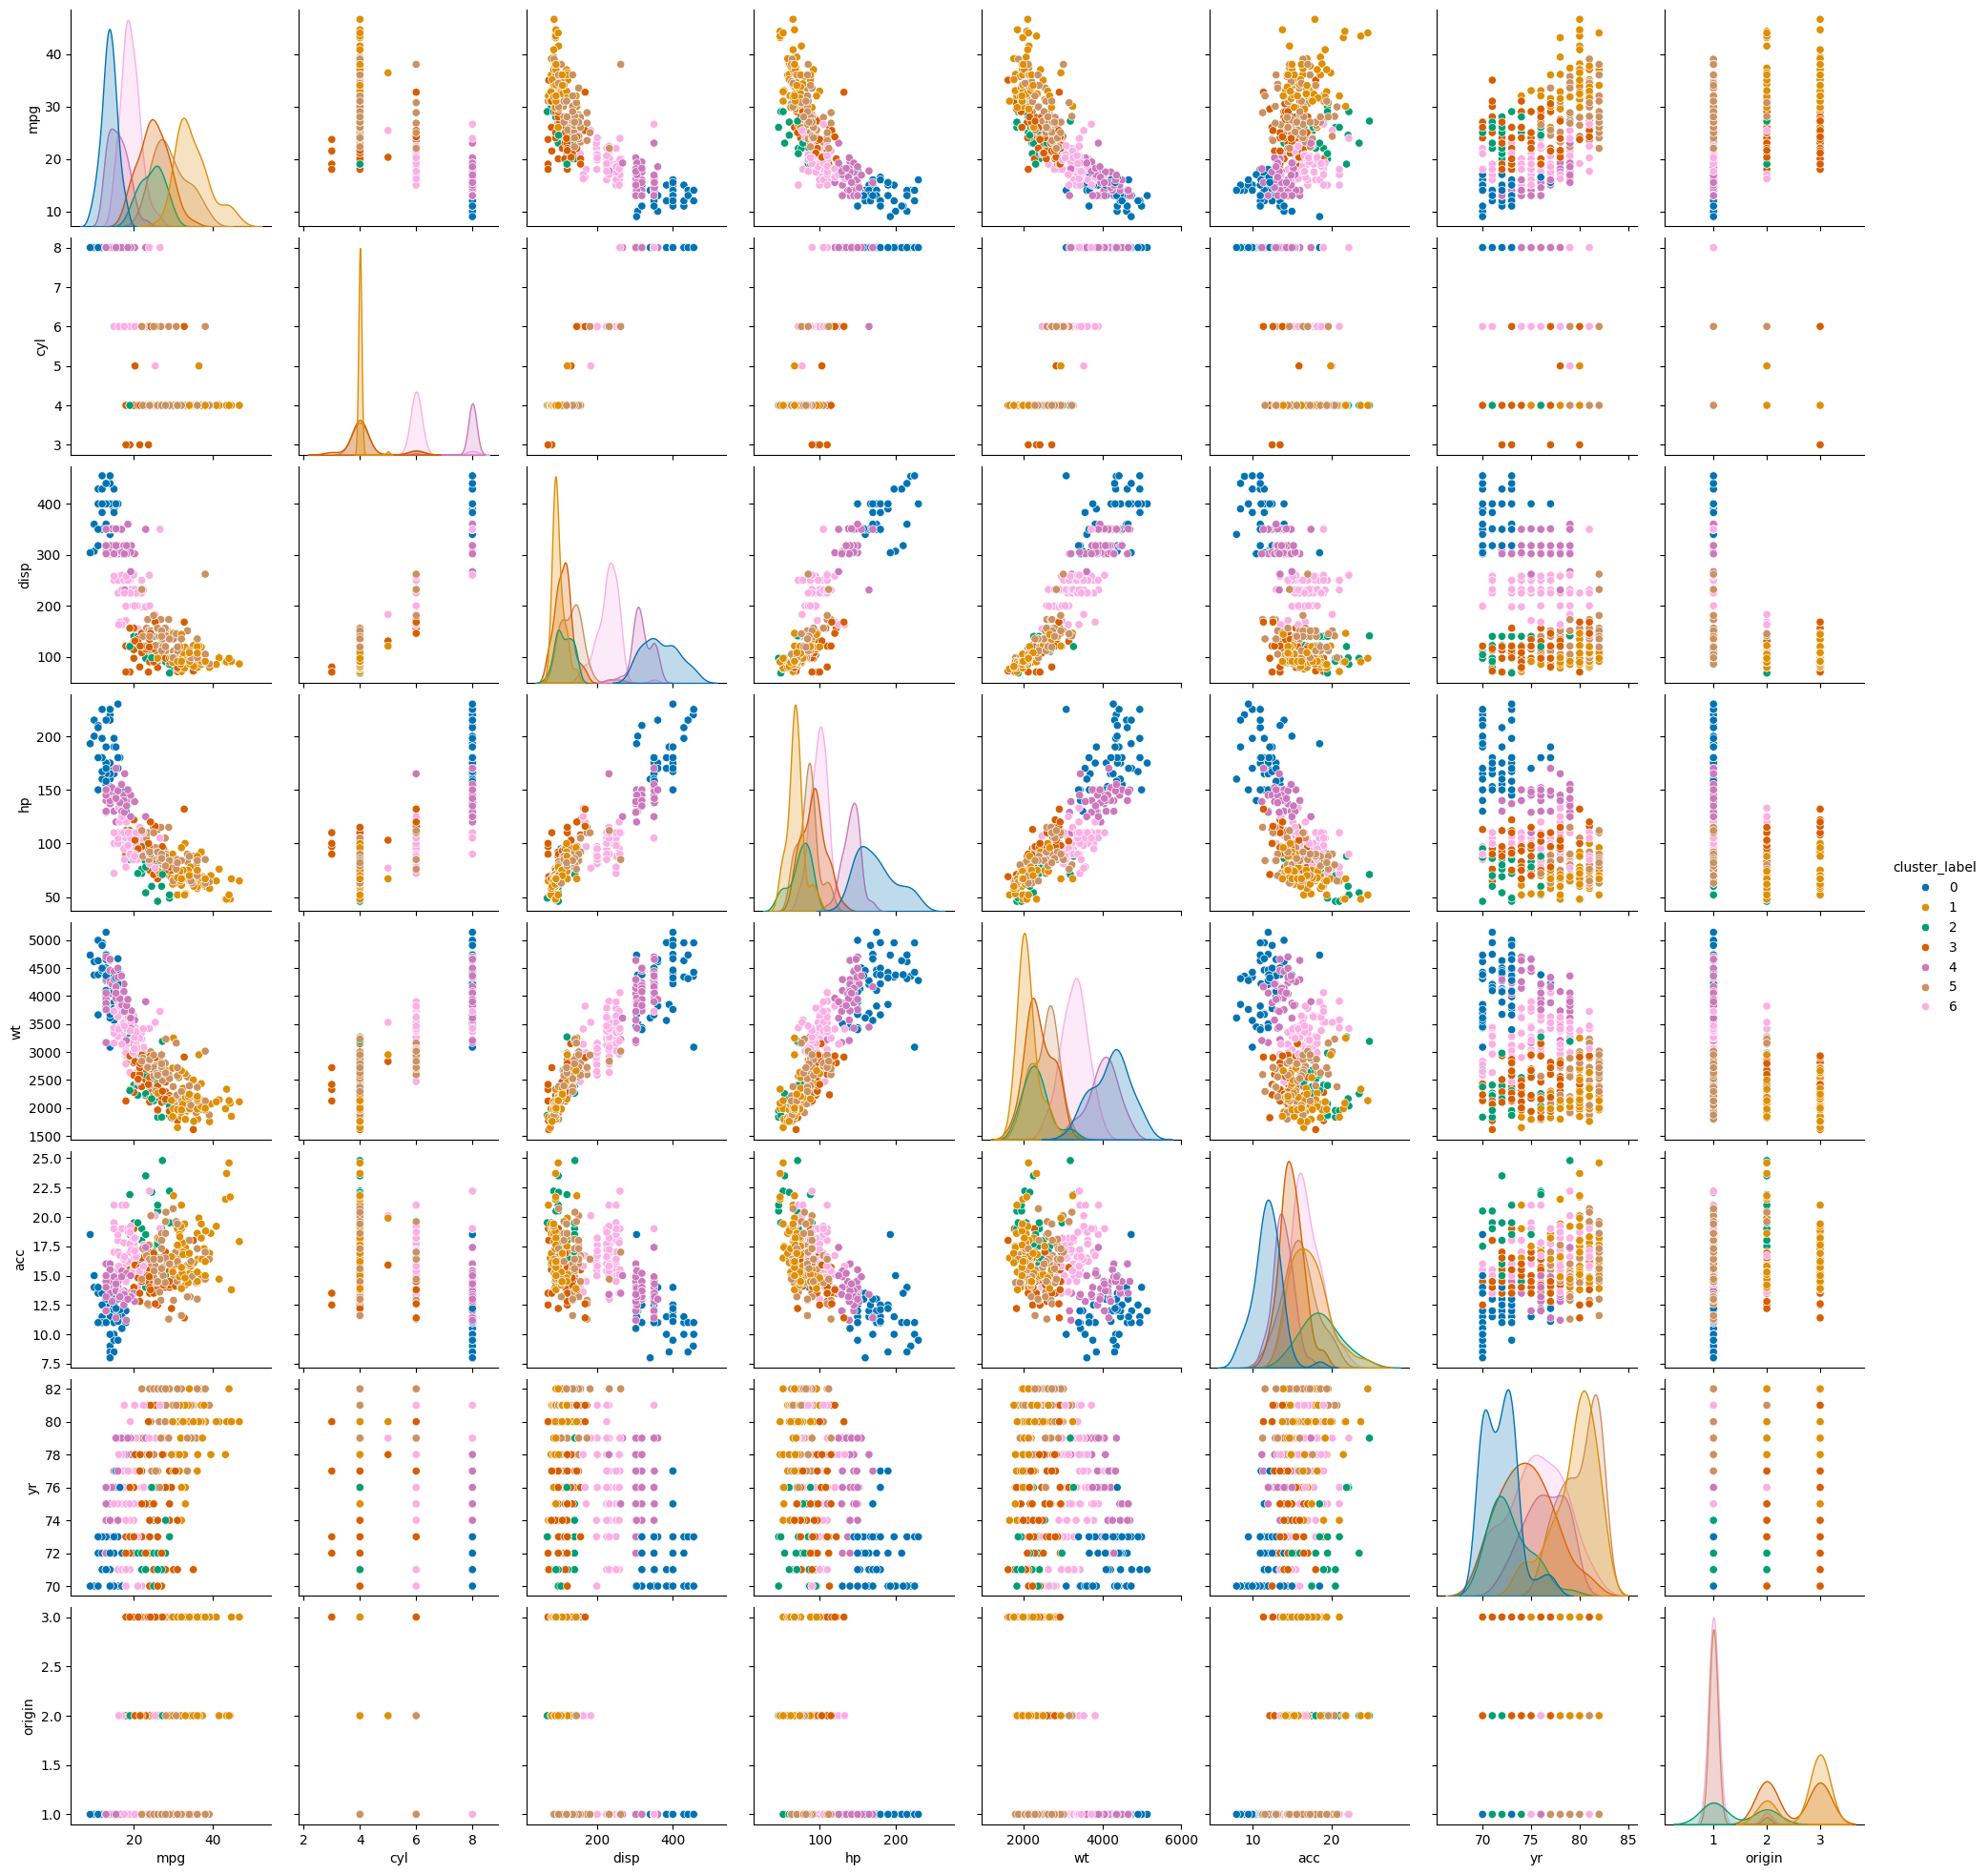

In [30]:
#Plot a visual and color the datapoints based upon clusters.
sns.pairplot(df3,hue='cluster_label',palette='colorblind');

In [31]:
#Pass a new DataPoint and predict which cluster it belongs to.
data = {
    'mpg': [12.5],
    'weight': [4850],
    'cylinder': [8],
    'displacement': [410],
    'hp': [650],
    'acceleration': [3.6],
    'model_year': [2022],
    'origin':[1]
}
new_data = pd.DataFrame(data)
new_data_scaled = scaler.fit_transform(new_data)
prediction = kmeans.predict(new_data_scaled)
print("Predicted Cluster for the Selected Row:", prediction[0])
print("The new datapoint belongs to 6th cluster.")

Predicted Cluster for the Selected Row: 6
The new datapoint belongs to 6th cluster.
